In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [134]:
import warnings
warnings.filterwarnings('ignore')
train_df = pd.read_csv("../data/train.csv")
train_df.set_index('Store',inplace=True)
store_df = pd.read_csv("../data/store.csv")
store_df.set_index('Store',inplace=True)
test_df = pd.read_csv("../data/test.csv")
test_df.set_index('Store',inplace=True)
train_df.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


In [135]:
train_df.describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [136]:
store_df.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [137]:
store_df.describe()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [138]:
#merge train and store data
df = pd.merge(train_df,store_df,how='inner',on='Store')
df.sample(10)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
244,1,2014-05-12,3245,391,1,0,0,0,d,a,710.0,3.0,2012.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
582,2,2015-04-21,5382,781,1,0,0,0,a,a,120.0,NaN,NaN,0,NaN,NaN,NaN
209,2,2013-07-09,6148,673,1,0,0,1,a,c,11680.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
799,7,2013-04-21,0,0,0,0,0,0,a,c,2700.0,NaN,NaN,0,NaN,NaN,NaN
1083,5,2013-11-08,5173,381,1,1,0,0,d,c,11540.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
323,3,2015-01-07,7597,619,1,1,0,1,d,c,8400.0,4.0,2012.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1091,1,2013-08-05,11217,1008,1,0,0,0,a,c,9990.0,NaN,NaN,0,NaN,NaN,NaN
362,1,2013-06-24,10806,1029,1,0,0,0,c,c,340.0,NaN,NaN,0,NaN,NaN,NaN
444,6,2013-08-10,12777,1618,1,0,0,0,c,a,1700.0,11.0,2009.0,0,NaN,NaN,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2         

In [140]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [141]:
# check the percentage of missing data in each column to determine whether we will impute or drop

percentage_missing = missing_values_table(df)
percentage_missing

Your selected dataframe has 17 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,508031,49.9,float64
Promo2SinceYear,508031,49.9,float64
PromoInterval,508031,49.9,object
CompetitionOpenSinceMonth,323348,31.8,float64
CompetitionOpenSinceYear,323348,31.8,float64
CompetitionDistance,2642,0.3,float64


In [142]:
#Dropping columns with more than 40% missing data
df=df.drop(columns=["PromoInterval","Promo2SinceWeek","Promo2SinceYear"])

In [143]:
# adding new variable
df['SalePerCustomer'] = df['Sales']/df['Customers']

In [144]:
df.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'SalePerCustomer'],
      dtype='object')

In [145]:
#Handling NaN
df.CompetitionDistance.fillna(df.CompetitionDistance.mode()[0],inplace=True)
df.CompetitionOpenSinceMonth.fillna(1, inplace=True)
df.CompetitionOpenSinceYear.fillna(df.CompetitionOpenSinceYear.mode()[0], inplace=True)
df.CompetitionOpenSinceMonth=df.CompetitionOpenSinceMonth.astype(int)
df.CompetitionOpenSinceYear=df.CompetitionOpenSinceYear.astype(int)

### univariate analysis

<AxesSubplot:xlabel='Sales', ylabel='Density'>

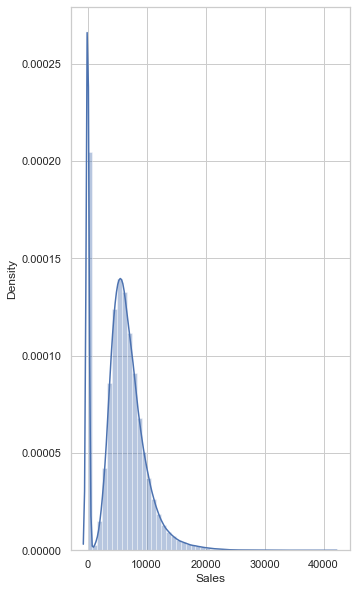

In [146]:
#Find the range of data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Sales"])

<AxesSubplot:xlabel='Customers', ylabel='Density'>

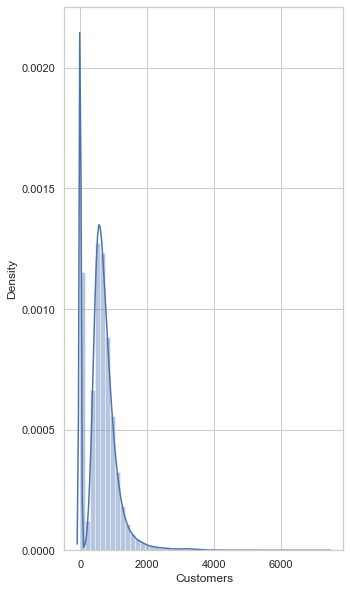

In [147]:
#Find the range of the data
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Customers"])

### checking for outliers

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

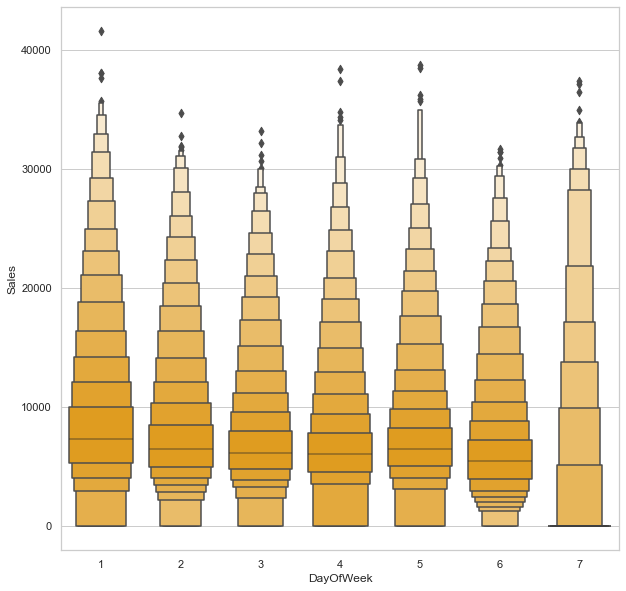

In [148]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=df,scale="linear",x="DayOfWeek",y="Sales",color="orange")

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

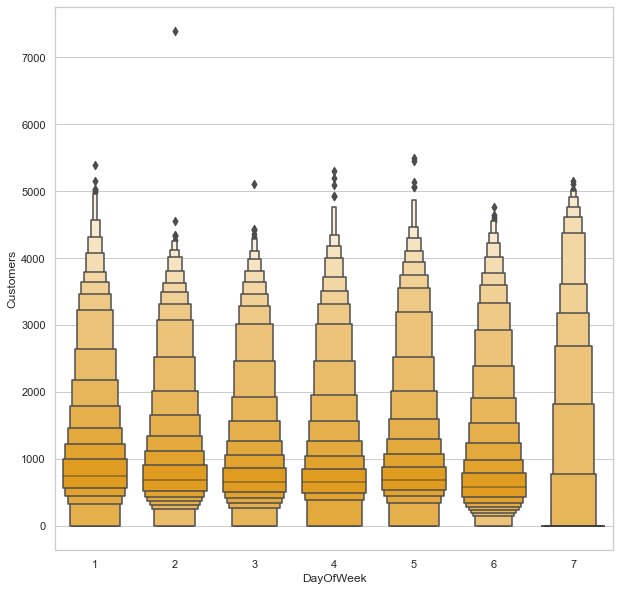

In [149]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=df, scale="linear",color="orange")

#### This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo

In [150]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Week"]=df["Date"].dt.week%4
df["Season"] = np.where(df["Month"].isin([3,4]),"Spring",np.where(df["Month"].isin([5,6,7,8]), "Summer",np.where(df["Month"].isin ([9,10,11]),"Fall",np.where(df["Month"].isin ([12,1,2]),"Winter","None"))))
df

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,SalePerCustomer,Year,Month,Day,Week,Season
Store,,,,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,9.482883,2015,7,31,3,Summer
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9,2008,0,9.194139,2015,7,30,3,Summer
1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9,2008,0,9.143403,2015,7,29,3,Summer
1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9,2008,0,8.948214,2015,7,28,3,Summer
1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9,2008,0,9.970588,2015,7,27,3,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,1,2013,1,14.073746,2013,1,5,1,Winter
1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,1,2013,1,13.926380,2013,1,4,1,Winter
1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,1,2013,1,14.323333,2013,1,3,1,Winter


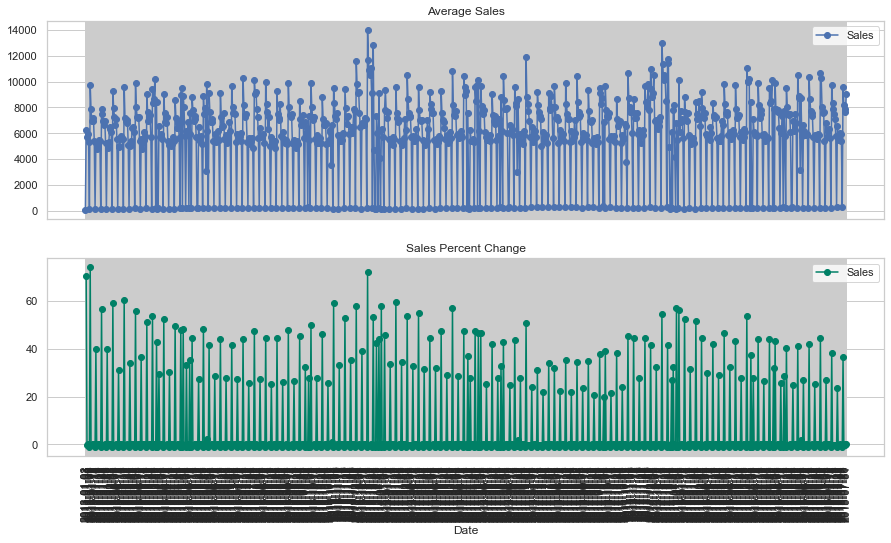

In [151]:
# group by date and get average sales, and precent change
average_sales = train_df.groupby('Date')["Sales"].mean()
pct_change_sales = train_df.groupby('Date')["Sales"].sum().pct_change()

fig,(axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

In [152]:
df.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,SalePerCustomer,Year,Month,Day,Week,Season
Store,,,,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,9.482883,2015,7,31,3,Summer
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9,2008,0,9.194139,2015,7,30,3,Summer
1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9,2008,0,9.143403,2015,7,29,3,Summer
1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9,2008,0,8.948214,2015,7,28,3,Summer
1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9,2008,0,9.970588,2015,7,27,3,Summer


<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

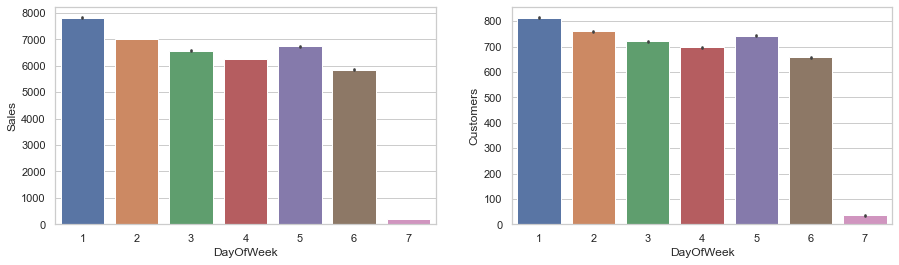

In [153]:
# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df, order=[1,2,3,4,5,6,7], ax=axis2)

#### Check for seasonality in both training and test sets - are the seasons similar between these two groups

In [154]:
seasonal_train = train_df[['Sales', 'Date','StateHoliday','SchoolHoliday']]
seasonal_train['Date'] = pd.to_datetime(seasonal_train['Date'])
seasonal_train['Date'].sort_index(ascending = False, inplace=True)
a = seasonal_train.set_index('Date').resample('W').sum()
a

,Sales,SchoolHoliday
Date,,
2013-01-06,39191048,1218
2013-01-13,45297407,1465
2013-01-20,44816122,1440
2013-01-27,44852778,1395
2013-02-03,45111487,1432
...,...,...
2015-07-05,44947483,1337
2015-07-12,45334942,1380
2015-07-19,45428341,1415


<AxesSubplot:xlabel='Date', ylabel='Sales'>

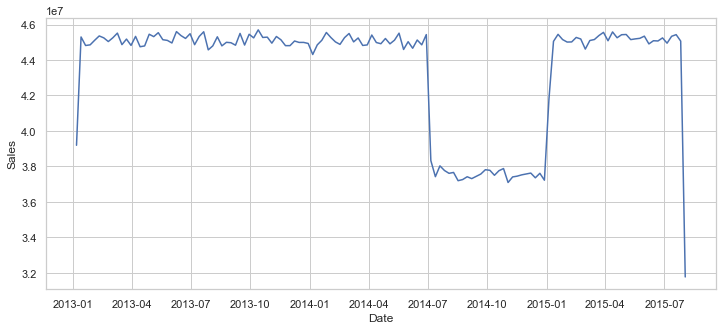

In [155]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=a.index, y=a['Sales'])

#### What can you say about the correlation between sales and number of customers?

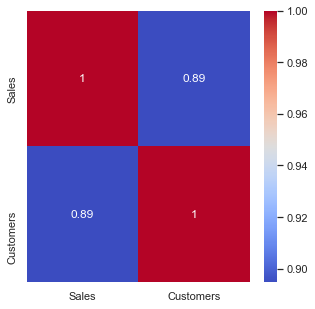

In [156]:
corr = df.loc[:,['Sales','Customers']].corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

#### there is a strong correlation between sales and number of customers

####  How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

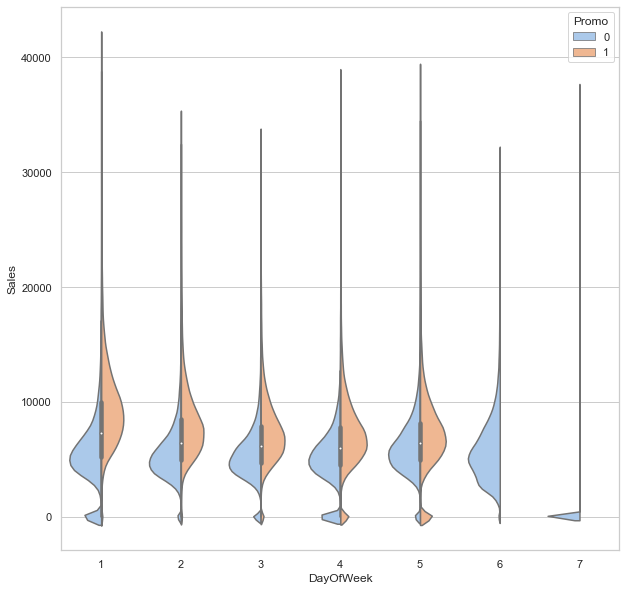

In [157]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=True, data=df)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

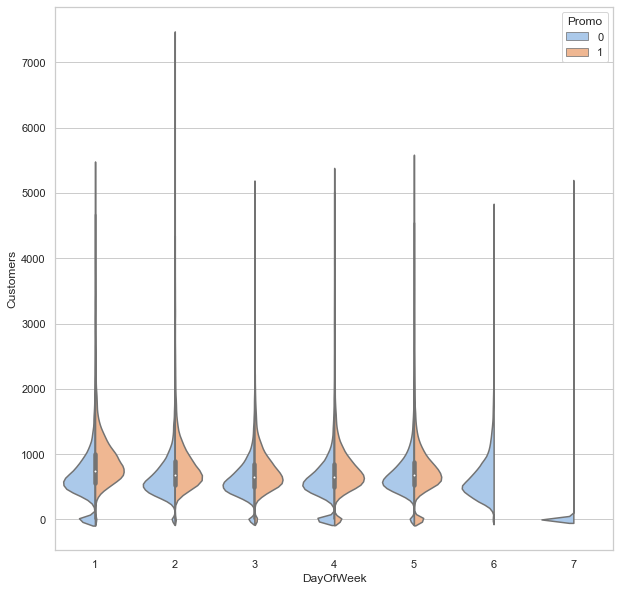

In [158]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Customers",hue="Promo",split=True, data=df)

#### The days promos were present have indeed shown a slight improvement in Sales. The plot above also shows that there was no promo offered on 6th and the 7th day of the week (Saturday and Sunday), and stores didn't suffer for doing so either, as it can be seen the no. of customers on the weekends, were more that that during the weekdays

#### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

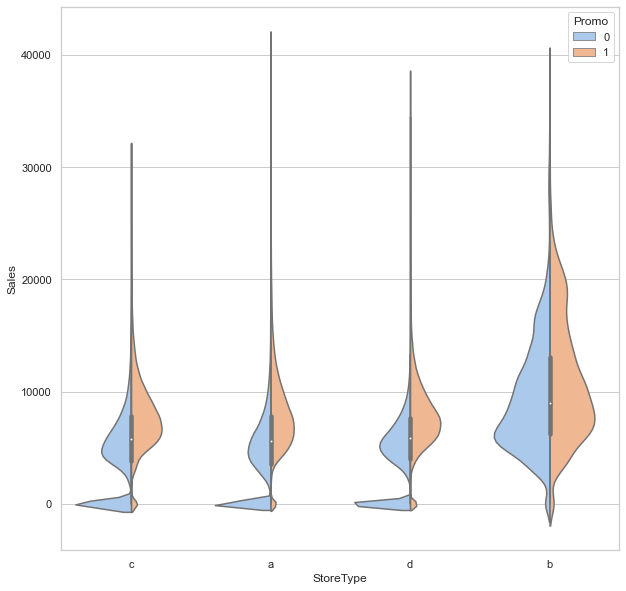

In [159]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.violinplot(x="StoreType",y="Sales",hue="Promo",split=True, data=df)

#### Trends of customer behavior during store open and closing times

#### Which stores are opened on all weekdays? How does that affect their sales on weekends? 

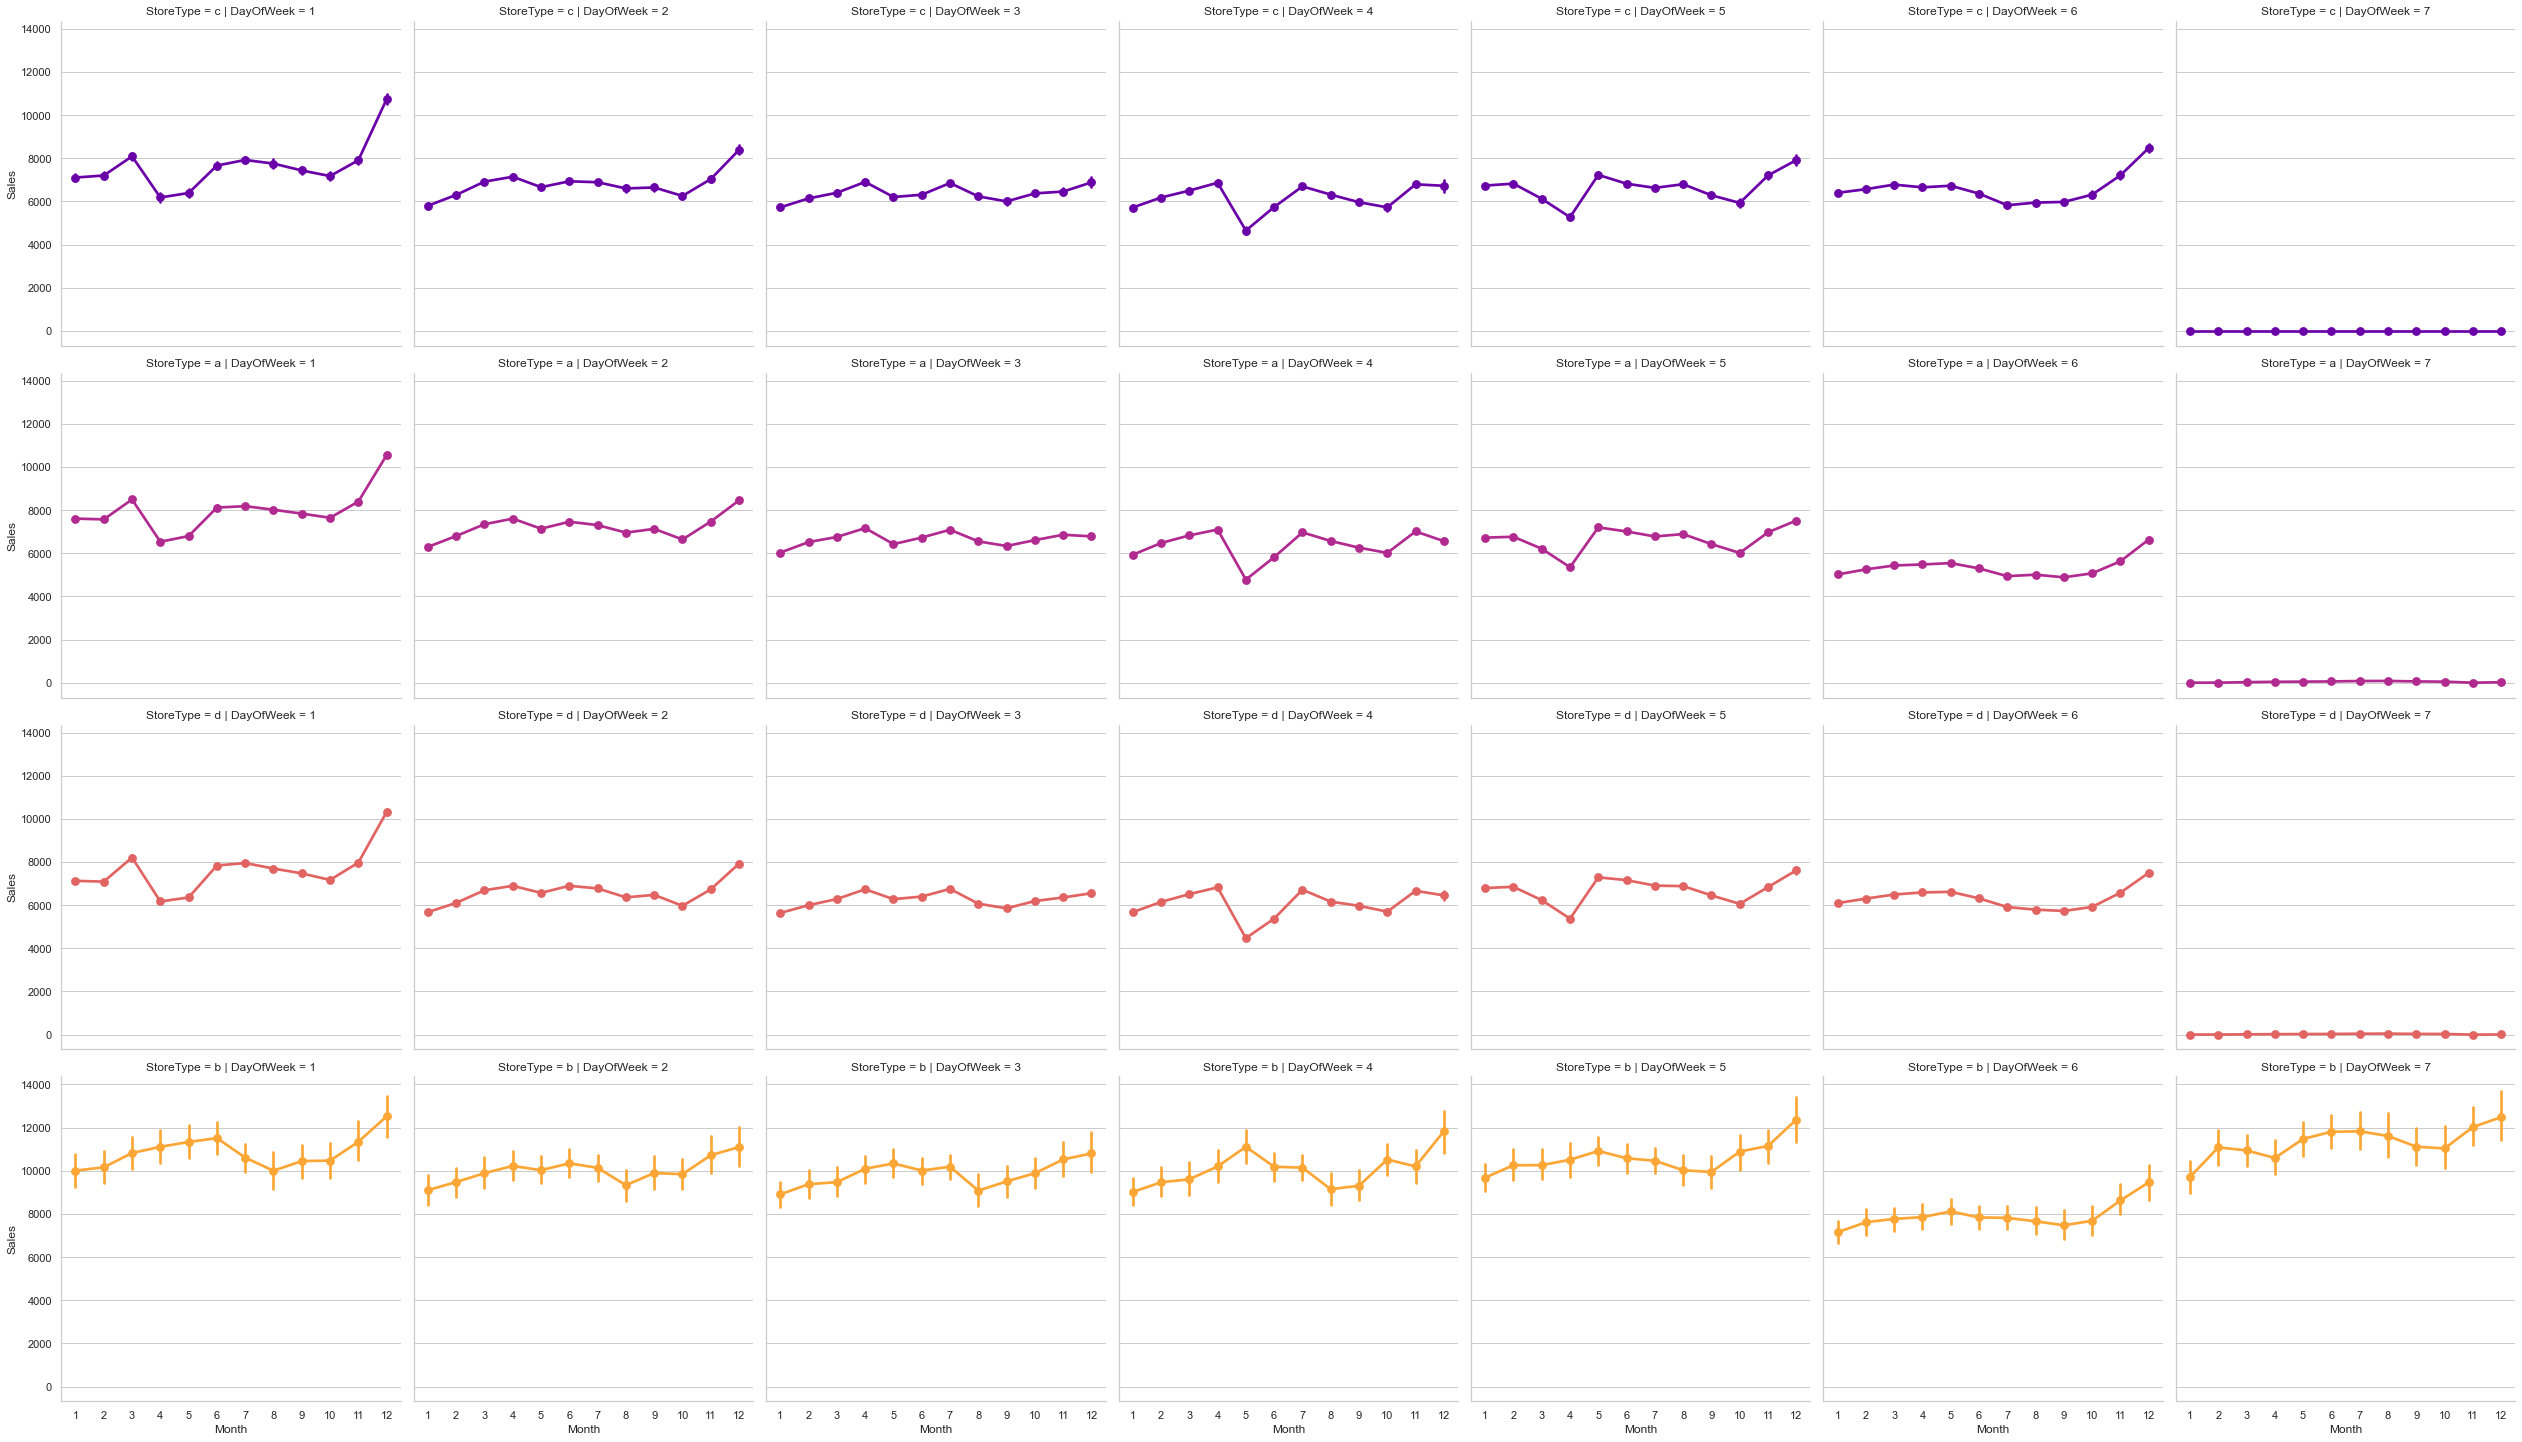

In [161]:
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = 'c')

### all the stores were open during the weekdays and this doesnt seem to affect perfomance on the weekends

#### Check how the assortment type affects sales

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

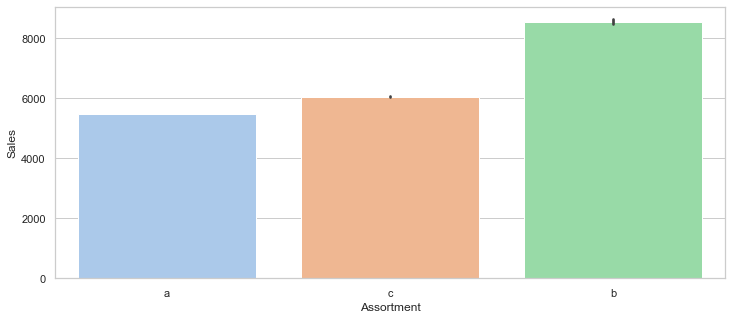

In [162]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Assortment'], y=df['Sales'])

### Assortment type B has the most amount of sales

#### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

<AxesSubplot:xlabel='CompetitionDistanceLOG', ylabel='Sales'>

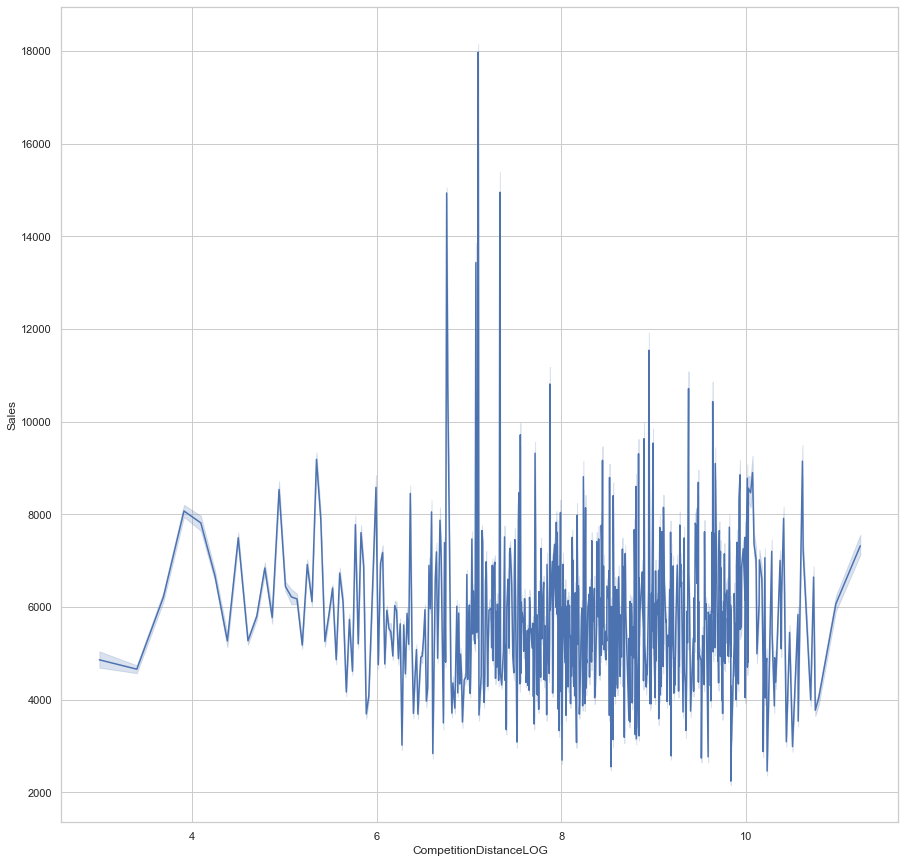

In [163]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
df["CompetitionDistanceLOG"]=np.log(df["CompetitionDistance"])
sns.lineplot(x="CompetitionDistanceLOG", y="Sales", data=df)

#### Competition Distance does seem to affect Sales. The stores with less CompetitionDistance didn't make more Sales distance only seems to matter if the competition are very near to each other ie same city center